In [99]:
import os
import json
import pandas as pd
from time import sleep
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': ''YOUR_API_KEY_HERE'' # Be careful sharing this!
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        response.raise_for_status()
        data = response.json()
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error encountered: {e}")
        return

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()

    file_path = '/Users/YOUR_USERNAME_HERE/Desktop/python scripts/API.csv'

    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df.to_csv(file_path, mode='a', index=False, header=False)

for i in range(333):
    api_runner()
    print(f"Run {i+1} completed")
    sleep(20)

Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed


KeyboardInterrupt: 

In [100]:
df = pd.read_csv(r'/Users/YOUR_USERNAME_HERE/Desktop/python scripts/API.csv')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12528,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19980487.00000,19980487.00000,False,1727812358299.29004,NaN,1,NaN,NaN,NaN,2026-01-25T19:31:00.000Z,86474.98724,27154164622.94090,46.96250,-1.10389,-2.99709,-9.38474,-0.95015,-3.74399,-24.77387,1727812358299.28857,59.12950,1815974731961.48999,NaN,2026-01-25T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-25 14:33:08.089787
1,1027,Ethereum,ETH,ethereum,11456,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120694435.09642,120694435.09642,True,340387994491.96997,NaN,2,NaN,NaN,NaN,2026-01-25T19:31:00.000Z,2820.24597,15896024530.13520,62.29610,-1.11897,-4.49858,-15.84312,-3.42645,-6.98030,-32.96863,340387994491.97125,11.64880,340387994491.96997,NaN,2026-01-25T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-25 14:33:08.089787
2,825,Tether USDt,USDT,tether,168338,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,186901333650.81253,189486597064.61761,True,189318018972.23001,NaN,3,NaN,NaN,NaN,2026-01-25T19:31:00.000Z,0.99911,66228304393.20447,28.01740,0.03219,0.07133,-0.06237,-0.00487,-0.09772,-0.09973,186735055556.32239,6.39050,189318018972.23001,NaN,2026-01-25T19:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-25 14:33:08.089787
3,1839,BNB,BNB,bnb,3103,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",136360440.33000,136360440.33000,136360440.33000,False,117194327758.32001,NaN,4,NaN,NaN,NaN,2026-01-25T19:32:00.000Z,859.44521,1751140045.50430,23.25480,-0.71765,-3.08981,-9.61384,3.36268,-3.86664,-25.05840,117194327758.31708,4.01060,117194327758.32001,NaN,2026-01-25T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-25 14:33:08.089787
4,52,XRP,XRP,xrp,1787,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60853233336.00000,99985724371.00000,False,181696328901.62000,NaN,5,NaN,NaN,NaN,2026-01-25T19:31:00.000Z,1.81722,2118295404.40614,71.78200,-0.99499,-5.01819,-11.63367,-1.41089,-18.76913,-32.06280,110583877533.53952,3.78440,181722270898.82001,NaN,2026-01-25T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-25 14:33:08.089787
5,3408,USDC,USDC,usd-coin,36763,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,72440828961.31258,72440828961.31258,False,72463775406.45000,NaN,6,60901219650.23000,60920510794.67763,NaN,2026-01-25T19:31:00.000Z,1.00032,6751000591.49994,-11.65210,0.05386,0.07622,0.03473,0.05469,0.02897,0.03805,72463775406.44823,2.47990,72463775406.45000,NaN,2026-01-25T19:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-25 14:33:08.089787
6,5426,Solana,SOL,solana,1077,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,565948416.52223,619042836.95387,True,74055294357.66000,NaN,7,525236893.30000,62833410579.84902,NaN,2026-01-25T19:31:00.000Z,119.62871,3320197101.10561,66.76580,-1.43053,-5.88087,-16.21104,-1.87564,-17.07022,-40.41662,67703677475.76682,2.31700,74055294357.66000,NaN,2026-01-25T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-25 14:33:08.089787
7,1958,TRON,TRX,tron,1283,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94714838642.80908,94714866880.53789,Tr

In [101]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [102]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.volume_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean() 

In [108]:
df3 = df2.stack()
df4 = df3.to_frame(name='values')
df5 = df4.reset_index()
df6 = df5.rename(columns = {'level_1': 'percent_change'})
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h',
                                                       'quote.USD.volume_change_24h',
                                                       'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d',
                                                       'quote.USD.percent_change_90d',],
                                                      ['1h','24h','7d','30d','60d','90d'])
df6




,name,percent_change,values
0,Bitcoin,1h,-0.56050
1,Bitcoin,24h,64.54190
2,Bitcoin,7d,-9.39999
3,Bitcoin,30d,-1.20456
4,Bitcoin,60d,-3.89591
5,Bitcoin,90d,-24.72994
6,Ethereum,1h,-0.81831
7,Ethereum,24h,80.04450
8,Ethereum,7d,-16.11845
9,Ethereum,30d,-4.00538


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

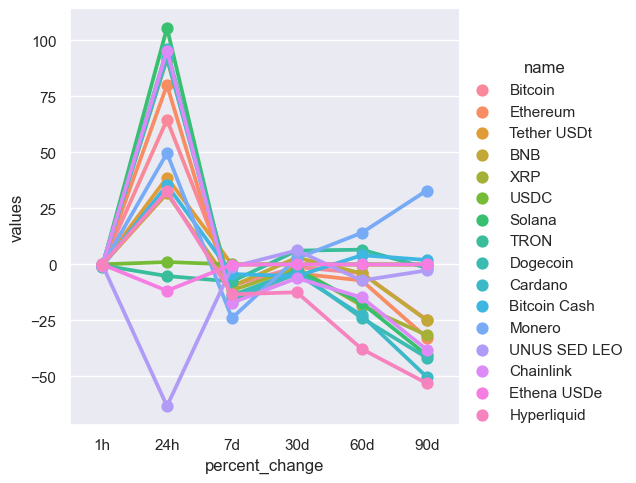

In [110]:
sns.catplot(x = 'percent_change', y='values', hue = 'name', data = df6, kind = 'point')